In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
train_images = train_images.astype('float32') / 255

In [4]:
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))
test_images = test_images.astype('float32') / 255

In [5]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [6]:
model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)), layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'), layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'), layers.Flatten(), 
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [8]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 30s 15ms/step - loss: 0.4972 - accuracy: 0.8177 - val_loss: 0.3814 - val_accuracy: 0.8626
Epoch 2/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.3230 - accuracy: 0.8815 - val_loss: 0.3233 - val_accuracy: 0.8847
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2755 - accuracy: 0.8997 - val_loss: 0.2988 - val_accuracy: 0.8938
Epoch 4/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2450 - accuracy: 0.9094 - val_loss: 0.2956 - val_accuracy: 0.8926
Epoch 5/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2217 - accuracy: 0.9183 - val_loss: 0.2608 - val_accuracy: 0.9071
Epoch 6/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2008 - accuracy: 0.9254 - val_loss: 0.2732 - val_accuracy: 0.9032
Epoch 7/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1848 - accuracy: 0.9308 - val_loss: 0.2698 -

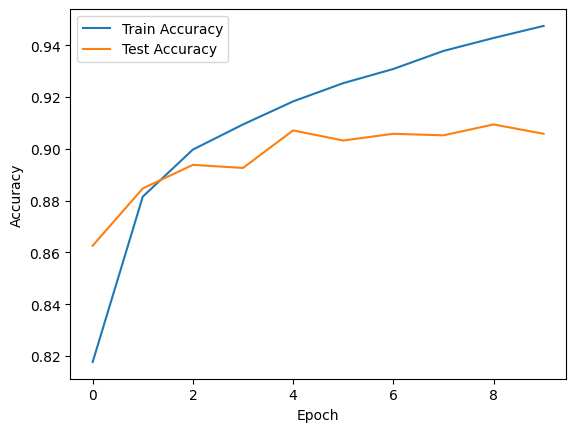

In [9]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

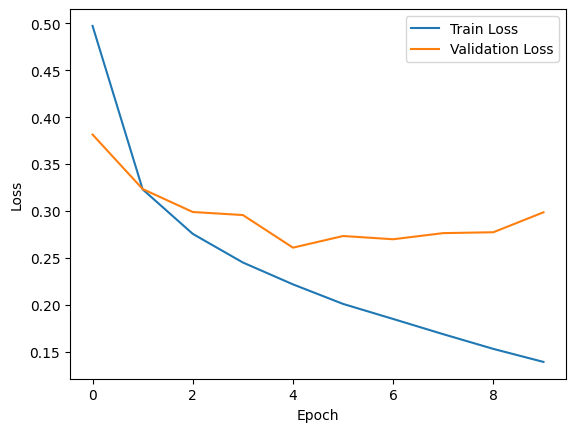

In [10]:
import numpy as np

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [12]:
# Calculate test accuracy
test_loss, test_accuracy = model.evaluate(test_images, test_labels,verbose=1)
print(f'Test Accuracy: {test_accuracy}')


313/313 [==============================] - 2s 7ms/step - loss: 0.2985 - accuracy: 0.9058
Test Accuracy: 0.9057999849319458


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0